In [1]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.preprocessing import LabelEncoder
import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns

labelencoder = LabelEncoder()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [4]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B


In [5]:
print('Train shape:',train.shape)
print('Test shape:',test.shape)

Train shape: (10000, 20)
Test shape: (5000, 19)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [8]:
train['LifeSquare'].unique()

array([        nan, 23.16922267, 47.67197161, ..., 16.55536345,
       22.3268698 , 22.30136721])

In [9]:
test['LifeSquare'].unique()

array([19.09418248, 42.5681326 ,         nan, ..., 19.00325904,
       20.97625714, 33.94434364])

In [10]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Проблемы с представленными данными:

    неполные данные в признаках:
    LifeSquare, 
    Healthcare_1
    не числовой тип данных признаков:
    Ecology_2,  
    Ecology_3,  
    Shops_2
    неточные данные в признаках:
    Square,  
    LifeSquare(жилая площадь больше общей площади),  
    HouseYear(год больше текущего),  
    HouseFloor(нулевое значение?),  
    KitchenSquare(площадь кухни больше общей площади)

In [11]:
train = train.drop(['Id'], axis=1, inplace=False)

Исправим значения HouseYear:

In [12]:
train.loc[train['HouseYear'] > 2020]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
8828,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096
9163,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396


In [13]:
train.loc[train['HouseYear'] == 4968, 'HouseYear'] = 1968
train.loc[train['HouseYear'] == 20052011, 'HouseYear'] = 2008

Добавим функцию для исправления HouseYear:

In [14]:
def check_year(df):
    df.loc[train['HouseYear'] > 2020, 'HouseYear'] = 2020
    return df

In [15]:
train.loc[train['Rooms'] < 1]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2194,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,NaN,3,9,B,158998.110646
3780,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976788
5894,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
6401,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,219281.918007
7644,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
7929,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
9767,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,NaN,0,0,B,268394.744389
9869,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798


In [16]:
train.loc[train['Square'] < 30]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
111,20,1.0,28.438794,32.514021,6.0,6,10.0,2014,0.019509,B,B,37,7687,11,176.0,5,5,B,199248.114376
130,23,1.0,29.706031,NaN,0.0,5,12.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,60502.583500
161,45,1.0,2.954309,5.257278,1.0,3,1.0,1977,0.195781,B,B,23,5212,6,NaN,3,2,B,438005.182323
234,23,1.0,28.859885,NaN,1.0,12,11.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,68375.615508
242,101,1.0,23.015919,15.739110,3.0,3,5.0,1967,0.225825,A,B,41,6558,7,1548.0,3,2,B,132427.987621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9631,90,1.0,21.121279,15.202620,3.0,4,5.0,1964,0.265089,B,B,37,5288,0,1937.0,3,2,B,113846.123763
9739,85,1.0,28.535084,12.733642,6.0,4,9.0,1967,0.037178,B,B,52,11217,1,2300.0,1,7,B,142269.268090
9869,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
9990,21,1.0,18.983962,11.419796,2.0,1,5.0,1967,0.194489,B,B,47,8004,3,125.0,3,5,B,112411.221700


Изменим нижнюю границу площади кухни:

In [17]:
train.loc[train['KitchenSquare'] < train['KitchenSquare'].quantile(.35), 'KitchenSquare'] = 4

In [18]:
train.loc[train['Square'] < train['LifeSquare'] + train['KitchenSquare']]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
8,1,1.0,46.887892,44.628132,4.0,12,20.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,160400.401732
19,45,1.0,42.367289,40.012529,4.0,16,14.0,2015,0.195781,B,B,23,5212,6,NaN,3,2,B,250466.980777
33,74,2.0,73.314975,74.131261,4.0,7,6.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,254005.381863
34,27,2.0,58.783661,55.441256,11.0,13,12.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,138396.984612
37,9,1.0,78.936164,76.746654,4.0,8,7.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,226206.962435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,14,1.0,42.029175,44.682167,10.0,4,4.0,2018,0.238617,B,B,26,3889,6,705.0,3,6,B,87556.385617
9965,52,3.0,85.796885,85.305246,4.0,15,17.0,1977,0.371149,B,B,34,7065,1,750.0,2,5,B,204462.983720
9979,6,1.0,40.043234,41.984322,4.0,3,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,134888.083598
9987,1,2.0,62.690057,64.602939,10.0,19,22.0,2018,0.007122,B,B,1,264,0,NaN,0,1,B,203908.192698


In [19]:
train.loc[train['KitchenSquare'].isna(), 'KitchenSquare'] = train['KitchenSquare'].median()

In [20]:
train.loc[train['KitchenSquare'] > train['KitchenSquare'].quantile(.95), 'KitchenSquare'] = train['KitchenSquare'].median()

In [21]:
def check_kitchen(df):
    df.loc[df['KitchenSquare'] < df['KitchenSquare'].quantile(.35), 'KitchenSquare'] = 4
    df.loc[df['KitchenSquare'].isna(), 'KitchenSquare'] = df['KitchenSquare'].median()
    df.loc[df['KitchenSquare'] > df['KitchenSquare'].quantile(.95), 'KitchenSquare'] = df['KitchenSquare'].median()
    return df

In [22]:
train.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315775,37.199645,6.509600,8.526700,12.609400,1984.86600,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,43.587592,0.839512,21.058732,86.241209,2.384843,5.241148,6.775974,18.41187,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,0.000000,1.136859,0.370619,4.000000,1.000000,0.000000,1910.00000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,20.000000,1.000000,41.774881,22.769832,4.000000,4.000000,9.000000,1974.00000,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1977.00000,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,75.000000,2.000000,65.900625,45.128803,8.000000,12.000000,17.000000,2001.00000,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,209.000000,19.000000,641.065193,7480.592129,12.000000,42.000000,117.000000,2020.00000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [23]:
train.loc[train['Square'] < train['LifeSquare'] + train['KitchenSquare']] 

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
8,1,1.0,46.887892,44.628132,4.0,12,20.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,160400.401732
19,45,1.0,42.367289,40.012529,4.0,16,14.0,2015,0.195781,B,B,23,5212,6,NaN,3,2,B,250466.980777
33,74,2.0,73.314975,74.131261,4.0,7,6.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,254005.381863
34,27,2.0,58.783661,55.441256,11.0,13,12.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,138396.984612
37,9,1.0,78.936164,76.746654,4.0,8,7.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,226206.962435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,14,1.0,42.029175,44.682167,10.0,4,4.0,2018,0.238617,B,B,26,3889,6,705.0,3,6,B,87556.385617
9965,52,3.0,85.796885,85.305246,4.0,15,17.0,1977,0.371149,B,B,34,7065,1,750.0,2,5,B,204462.983720
9979,6,1.0,40.043234,41.984322,4.0,3,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,134888.083598
9987,1,2.0,62.690057,64.602939,10.0,19,22.0,2018,0.007122,B,B,1,264,0,NaN,0,1,B,203908.192698


In [24]:
train.loc[train['LifeSquare'].isna(), 'LifeSquare'] = train['LifeSquare'].median()

In [25]:
condition = (train['Square'] > train['LifeSquare'] + train['KitchenSquare'])
diff = train.loc[condition, 'Square'].median() - train.loc[condition, 'LifeSquare'].median() - train.loc[condition, 'KitchenSquare'].median()
print(diff)

13.732049731857792


In [26]:
oposite_cond = (train['Square'] < train['LifeSquare'] + train['KitchenSquare'])
train.loc[oposite_cond, 'Square'] = train.loc[oposite_cond, 'LifeSquare'] + train.loc[oposite_cond, 'KitchenSquare'] + diff

In [27]:
def check_Square(df):
    df.loc[df['LifeSquare'].isna(), 'LifeSquare'] = df['LifeSquare'].median()
    condition = (df['Square'] > df['LifeSquare'] + df['KitchenSquare'])
    diff = df.loc[condition, 'Square'].median() - df.loc[condition, 'LifeSquare'].median() - df.loc[condition, 'KitchenSquare'].median()
    oposite_cond = (df['Square'] < df['LifeSquare'] + df['KitchenSquare'])
    df.loc[oposite_cond, 'Square'] = df.loc[oposite_cond, 'LifeSquare'] + df.loc[oposite_cond, 'KitchenSquare'] + diff
    return df

In [28]:
train['Ecology_2'].unique()

array(['B', 'A'], dtype=object)

In [29]:
train['Ecology_3'].unique()

array(['B', 'A'], dtype=object)

In [30]:
train.select_dtypes(include='object').columns.tolist()

['Ecology_2', 'Ecology_3', 'Shops_2']

In [31]:
train['Ecology_2'] = labelencoder.fit_transform(train['Ecology_2'])

In [32]:
train['Ecology_2'].unique()

array([1, 0])

In [33]:
train['Ecology_3'] = labelencoder.fit_transform(train['Ecology_3'])

In [34]:
train['Shops_2'] = labelencoder.fit_transform(train['Shops_2'])

In [35]:
def check_non_numeric(df):
    df['Ecology_2'] = labelencoder.fit_transform(df['Ecology_2'])
    df['Ecology_3'] = labelencoder.fit_transform(df['Ecology_3'])
    df['Shops_2'] = labelencoder.fit_transform(df['Shops_2'])
    return df

In [36]:
train['Healthcare_1'].unique()

array([  nan, 1183.,  240., 2078.,   80.,  176.,  540., 2620.,   30.,
       1937., 1130.,  705., 1970.,  520.,  770., 1020., 1322., 1340.,
       1940., 2300.,  320., 2301., 3300., 4702., 2857.,  145., 2643.,
       1406.,  350.,  628., 1548.,  125., 1430., 2672.,  900., 1145.,
       1046.,  620., 4087.,   75., 1015.,  830.,  229.,  165., 1036.,
        990., 1084.,  750.,  645.,  562., 2729.,  100.,   32.,  800.,
        810., 1450., 4129.,  920.,  730., 2715., 1308.,   46., 4508.,
       1894., 1575.,  262.,  192., 1547., 1994., 2890., 2500.,  370.,
        325., 4849.,   35., 1815., 3855., 1786.,  200.,    0.])

In [37]:
train.loc[train['Healthcare_1'].isna(), 'Healthcare_1'] = train['Healthcare_1'].median()

In [38]:
def check_healthcare_1(df):
    df.loc[df['Healthcare_1'].isna(), 'Healthcare_1'] = df['Healthcare_1'].median()
    return df

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     10000 non-null  float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  int64  
 10  Ecology_3      10000 non-null  int64  
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   10000 non-null  float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  int64  
 18  Price  

In [40]:
train.loc[train['Floor'] > train['HouseFloor']]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
17,8,2.0,49.396000,28.299600,5.0,6,5.0,1962,0.458174,1,0,26,4439,1,1130.0,1,5,1,186971.926566
19,45,1.0,57.744578,40.012529,4.0,16,14.0,2015,0.195781,1,1,23,5212,6,900.0,3,2,1,250466.980777
21,20,3.0,75.611065,47.494621,8.0,11,9.0,1976,0.019509,1,1,37,7687,11,176.0,5,5,1,366916.246494
24,27,1.0,44.203947,32.781260,4.0,2,0.0,1977,0.072158,1,1,2,629,1,900.0,0,0,0,135466.559958
25,6,2.0,65.409965,32.781260,4.0,18,1.0,1977,0.243205,1,1,5,1564,0,540.0,0,0,1,191205.272608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,48,3.0,115.884852,98.152802,4.0,15,1.0,2017,0.041125,1,1,46,9515,5,900.0,1,10,1,524365.550705
9968,1,3.0,86.487550,32.781260,4.0,18,17.0,1977,0.007122,1,1,1,264,0,900.0,0,1,1,248248.935528
9970,6,1.0,41.310416,19.117077,9.0,18,17.0,1977,0.243205,1,1,5,1564,0,540.0,0,0,1,114878.830713
9975,6,2.0,52.573133,32.781260,4.0,18,17.0,1977,0.243205,1,1,5,1564,0,540.0,0,0,1,154366.031184


In [41]:
train.loc[train['HouseFloor'] == 0, 'HouseFloor'] = train.loc[train['HouseFloor'] == 0, 'Floor']

In [42]:
train.loc[train['Floor'] > train['HouseFloor']]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
17,8,2.0,49.396000,28.299600,5.0,6,5.0,1962,0.458174,1,0,26,4439,1,1130.0,1,5,1,186971.926566
19,45,1.0,57.744578,40.012529,4.0,16,14.0,2015,0.195781,1,1,23,5212,6,900.0,3,2,1,250466.980777
21,20,3.0,75.611065,47.494621,8.0,11,9.0,1976,0.019509,1,1,37,7687,11,176.0,5,5,1,366916.246494
25,6,2.0,65.409965,32.781260,4.0,18,1.0,1977,0.243205,1,1,5,1564,0,540.0,0,0,1,191205.272608
26,88,3.0,83.262530,4.769174,4.0,13,1.0,1977,0.127376,1,1,43,8429,3,900.0,3,9,1,410883.892020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9953,57,1.0,38.485252,22.550608,8.0,19,17.0,1992,0.133215,1,1,49,11395,3,1406.0,3,4,0,183485.284995
9960,48,3.0,115.884852,98.152802,4.0,15,1.0,2017,0.041125,1,1,46,9515,5,900.0,1,10,1,524365.550705
9968,1,3.0,86.487550,32.781260,4.0,18,17.0,1977,0.007122,1,1,1,264,0,900.0,0,1,1,248248.935528
9970,6,1.0,41.310416,19.117077,9.0,18,17.0,1977,0.243205,1,1,5,1564,0,540.0,0,0,1,114878.830713


In [43]:
train.loc[train['Floor'] > train['HouseFloor'], 'HouseFloor'] = train.loc[train['Floor'] > train['HouseFloor'], 'Floor']

In [44]:
train.loc[train['Floor'] > train['HouseFloor']]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [45]:
def check_floors(df):
    df.loc[df['HouseFloor'] == 0, 'HouseFloor'] = df.loc[df['HouseFloor'] == 0, 'Floor']
    df.loc[df['Floor'] > df['HouseFloor'], 'HouseFloor'] = df.loc[df['Floor'] > df['HouseFloor'], 'Floor']
    return df

In [46]:
train.loc[train['Rooms'] > 8]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2004,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,1,1,74,19083,2,900.0,5,15,1,317265.323792
2728,9,10.0,60.871266,38.420681,10.0,3,3.0,1994,0.161532,1,1,25,5648,1,30.0,2,4,1,172329.270863
6088,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,1,1,1,264,0,900.0,0,1,1,78364.616704


In [47]:
train.loc[train['Rooms'] > 8] = train['Rooms'].median()

In [48]:
def check_rooms(df):
    df.loc[df['Rooms'] > 8] = df['Rooms'].median()
    return df

In [49]:
 def check_data(df):
    df = check_year(df)
    df = check_kitchen(df)
    df = check_Square(df)
    df = check_non_numeric(df)
    df = check_healthcare_1(df)
    df = check_floors(df)
    df = check_rooms(df)
    return df

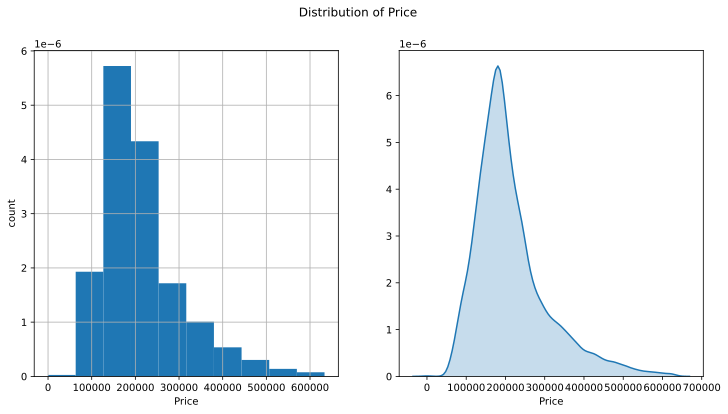

In [50]:
plt.figure(figsize = (12, 6))

plt.subplot(121)
train['Price'].hist(density=True)
plt.ylabel('count')
plt.xlabel('Price')

plt.subplot(122)
sns.kdeplot(train['Price'], shade=True, legend=False)
plt.xlabel('Price')

plt.suptitle('Distribution of Price')
plt.show()

In [51]:
target_mean = train['Price'].mean()
target_median = train['Price'].median()
target_bins = train['Price'] // 10000 * 10000
# 0 - 10000 --> 0
# 10001 - 20000 --> 1
# ...

target_adjusted_mode = target_bins.mode()[0]

target_adjusted_mode

180000.0

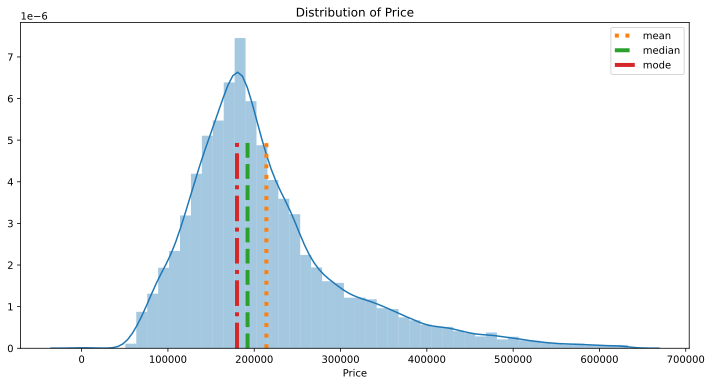

In [52]:
plt.figure(figsize = (12, 6))

sns.distplot(train['Price'], bins=50)

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 10, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_adjusted_mode] * 10, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of Price')
plt.legend()
plt.show()

In [53]:
train['NewBuilding'] = 0
train.loc[train['HouseYear'] > 2016, 'NewBuilding'] = 1 

In [60]:
def new_features(df):
    df['NewBuilding'] = 0
    df.loc[df['HouseYear'] > 2016, 'NewBuilding'] = 1 
    return df
test = check_data(test)
test = new_features(test)
test.info()

In [55]:
features = ['DistrictId',
            'Square', 
            'Rooms', 
            'LifeSquare',
            'KitchenSquare',
            'HouseYear', 
            'Ecology_1', 
            'Ecology_2', 
            'Ecology_3',
            'Social_1',
            'Social_2',
            'Social_3',
            'Shops_1', 
            'Shops_2', 
            'Healthcare_1',
            'Helthcare_2',
            'Floor',
            'HouseFloor',
            'NewBuilding']
target_name = 'Price'

Random Forest Regressor Model

In [56]:
X = train[features]
y = train[target_name]

test = test[features]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

In [58]:
rf_model = RandomForestRegressor(random_state=21, criterion='mse')
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=21)

In [59]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_test)

print(r2(y_train, y_train_preds))
print(r2(y_test, y_test_preds))

0.9586712613178888
0.73247477243779


In [61]:
test.head()

,DistrictId,Square,Rooms,LifeSquare,KitchenSquare,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Shops_1,Shops_2,Healthcare_1,Helthcare_2,Floor,HouseFloor,NewBuilding
0,44.0,36.847630,1.0,19.094182,5.0,1970.0,0.036122,1.0,1.0,24.0,4378.0,0.0,1.0,1.0,1036.0,1.0,5.0,9.0,0
1,62.0,66.416938,1.0,42.568133,10.0,2017.0,0.072158,1.0,1.0,2.0,629.0,1.0,0.0,0.0,900.0,0.0,7.0,17.0,1
2,27.0,59.463678,2.0,32.925087,9.0,1977.0,0.211401,1.0,1.0,9.0,1892.0,0.0,1.0,1.0,900.0,0.0,19.0,19.0,0
3,23.0,49.646030,3.0,33.893825,6.0,1965.0,0.014073,1.0,1.0,2.0,475.0,0.0,0.0,1.0,900.0,0.0,2.0,2.0,0
4,74.0,53.837056,1.0,32.925087,4.0,1977.0,0.309479,1.0,1.0,35.0,7715.0,4.0,6.0,1.0,990.0,0.0,8.0,17.0,0


In [62]:
submit = pd.read_csv('sample_submission.csv')
submit.head()

,Id,Price
0,4567,200000.0
1,5925,200000.0
2,960,200000.0
3,3848,200000.0
4,746,200000.0


In [70]:
predictions = rf_model.predict(test)
predictions.size

5000

In [71]:
submit['Price'] = predictions
submit.head()

,Id,Price
0,4567,158886.016194
1,5925,125384.269215
2,960,136865.741094
3,3848,124684.583403
4,746,197994.054528


In [72]:
submit.to_csv('Elizarova_submit.csv', index=False)